<a href="https://colab.research.google.com/github/InnaAndreeva/AutoML/blob/main/AutoML_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lightautoml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.4/416.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.7/215.7 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.5/309.5 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 91.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 65.2

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error

In [30]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

In [5]:
housing = fetch_california_housing(as_frame=True)
housing = housing.frame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


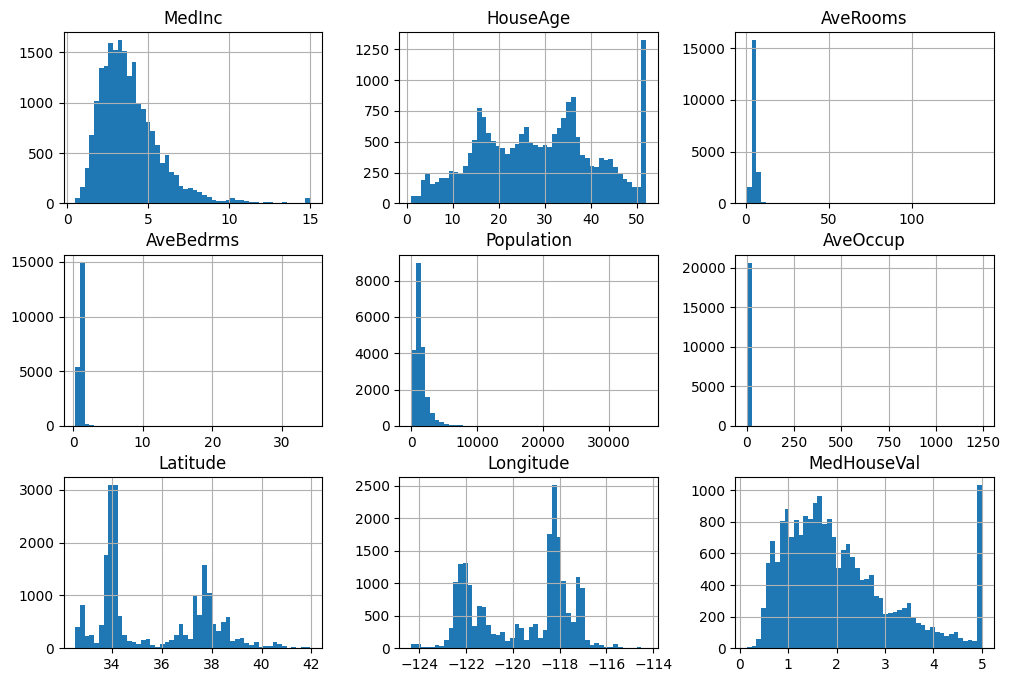

In [28]:
housing.hist(bins=50, figsize=(12,8))
plt.show()

In [6]:
X = housing.iloc[:,:-1]
y = housing.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
train_df = X_train
train_df['MedHouseVal'] = y_train
train_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,1.030
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,3.821
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,1.726
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,0.934
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80,0.965


In [8]:
test_df = X_test
test_df['MedHouseVal'] = y_test
test_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.47700
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.45800
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.18600
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.78000


In [35]:
task = Task('reg', metric='mse')

# Initialize LightAutoML model
automl = TabularAutoML(task=task,
                       timeout=600, # Time limit in seconds
                       cpu_limit=4, # Number of CPUs to use
                       general_params={'use_algos': [['linear_l2', 'lgb', 'cb', 'xgb']]}
                      )

# Fit the model
automl.fit_predict(train_df, roles={'target': 'MedHouseVal'})

# Predict on the same data for demonstration purposes
pred = automl.predict(test_df)

INFO:lightautoml.automl.presets.base:Stdout logging level is ERROR.
INFO:lightautoml.automl.presets.base:Task: reg

INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:
INFO:lightautoml.automl.presets.base:- time: 600.00 seconds
INFO:lightautoml.automl.presets.base:- CPU: 4 cores
INFO:lightautoml.automl.presets.base:- memory: 16 GB

INFO:lightautoml.reader.base:Train data shape: (16512, 9)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:37: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []
INFO:lightautoml.automl.base:Layer 1 train process start. Time left 591.18 secs
INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100,

In [36]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, pred.data[:, 0])
medae = median_absolute_error(y_test, pred.data[:, 0])
mae = mean_absolute_error(y_test, pred.data[:, 0])

# Print evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Median Absolute Error (MedAE):', medae)
print('Mean Absolute Error (MAE):', mae)

Mean Squared Error (MSE): 0.18771825102055167
Median Absolute Error (MedAE): 0.17764823198318486
Mean Absolute Error (MAE): 0.2804199625089996


<Axes: xlabel='Feature'>

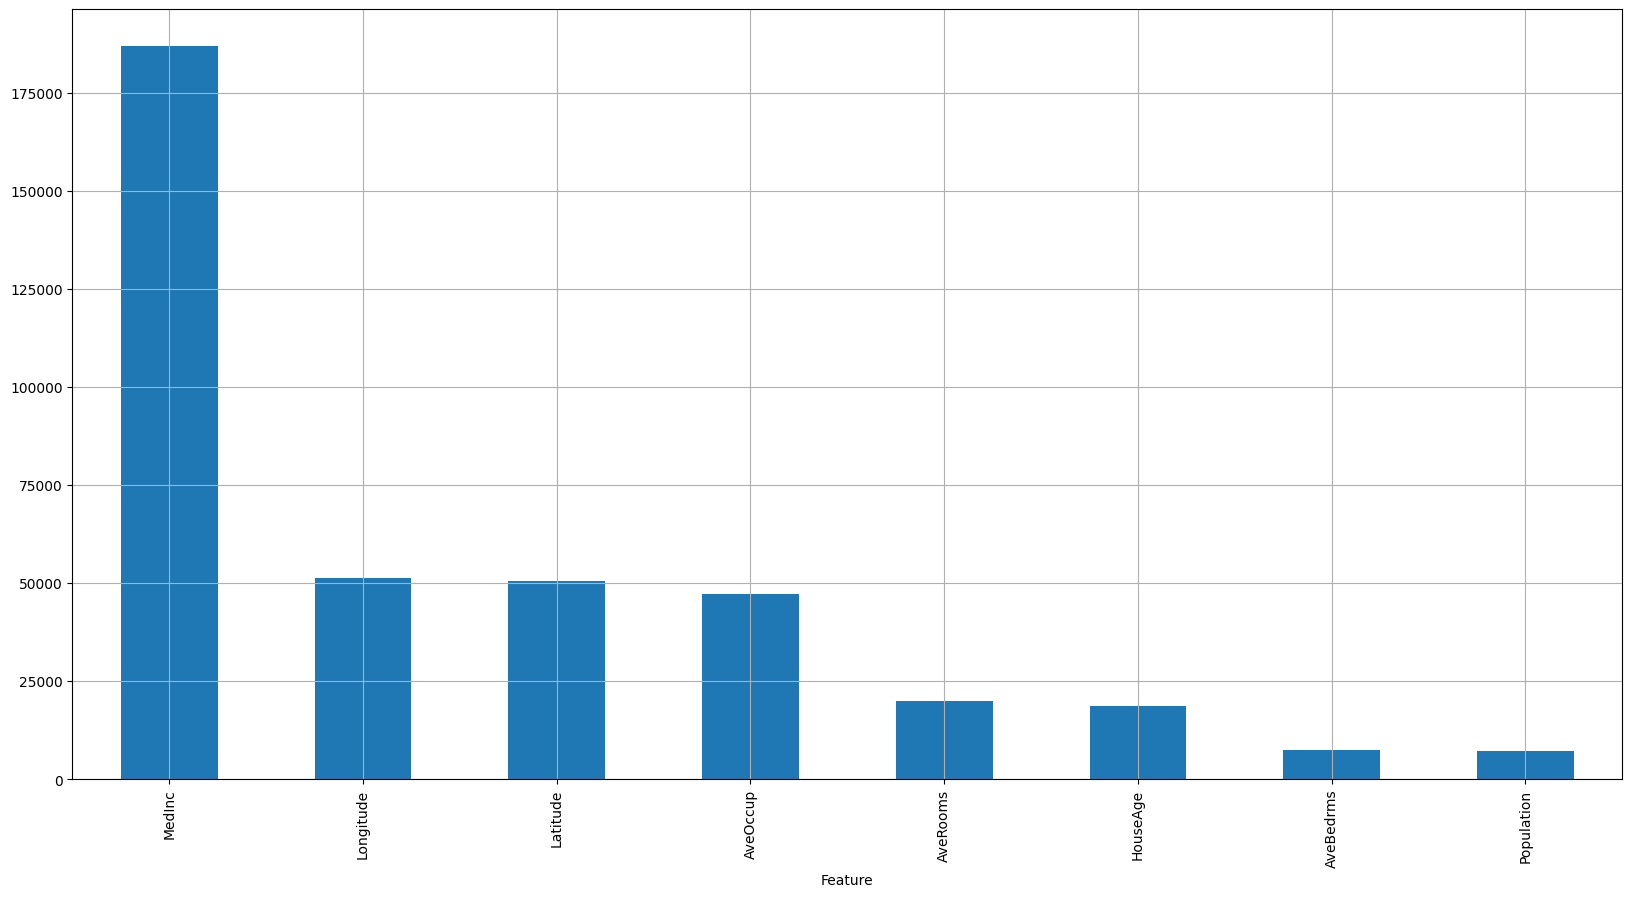

In [38]:
# Fast feature importances calculation
fast_fi = automl.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (20, 10), grid = True)

# Mljar

In [1]:
!pip install mljar-supervised

In [2]:
from supervised.automl import AutoML

In [11]:
# Initialize AutoML
automl = AutoML(total_time_limit=10, mode="Explain")

# Train the model
automl.fit(X_train, y_train)

# Predict on the test set
y_pred = automl.predict(X_test)

Linear algorithm was disabled.
AutoML directory: AutoML_9
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 1.159509 trained in 0.5 seconds
2_DecisionTree rmse 0.157126 trained in 11.27 seconds
Skip default_algorithms because of the time limit.
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.157126 trained in 0.54 seconds
AutoML fit time: 17.01 seconds
AutoML best model: 2_DecisionTree


In [12]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Median Absolute Error (MedAE):', medae)
print('Mean Absolute Error (MAE):', mae)

Mean Squared Error (MSE): 0.02393780904629516
Median Absolute Error (MedAE): 0.12394881286426707
Mean Absolute Error (MAE): 0.13033190176844073


#H2O AutoML

In [13]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 4.3 MB/s eta 0:00:00


In [14]:
import h2o
from h2o.estimators import H2OGeneralizedLinearEstimator, H2ORandomForestEstimator, H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

In [15]:
# Initialize H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp26tnn78h
  JVM stdout: /tmp/tmp26tnn78h/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp26tnn78h/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 1 day
H2O_cluster_name:,H2O_from_python_unknownUser_2pbu3i
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [29]:
# Load the California Housing dataset
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

In [30]:
# Convert numpy arrays to H2OFrame
df_X = h2o.H2OFrame(X)
df_y = h2o.H2OFrame(y.reshape(-1, 1), column_names=['target'])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [32]:
# Concatenate X and y H2OFrames
df = df_X.cbind(df_y)

# Split the dataset into train and test sets
train, test = df.split_frame(ratios=[0.8], seed=42)

# Define features and target
features = df_X.columns
target = 'target'

In [33]:
# Initialize and train models
models = [
    H2OGeneralizedLinearEstimator(family='gaussian', nfolds=5),
    H2ORandomForestEstimator(ntrees=50, nfolds=5),
    H2OGradientBoostingEstimator(ntrees=50, nfolds=5)
]

for model in models:
    model.train(x=features, y=target, training_frame=train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [28]:
# Initialize and train models
models = [
    H2OGeneralizedLinearEstimator(family='gaussian', nfolds=5),
    H2ORandomForestEstimator(ntrees=50, nfolds=5),
    H2OGradientBoostingEstimator(ntrees=50, nfolds=5)
]

In [24]:
for model in models:
    model.train(x=X-train, y=y_train, training_frame=train)

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [34]:
# Predictions on test set
preds = [model.predict(test) for model in models]

# Calculate evaluation metrics
metrics = {
    'MSE': [mean_squared_error(test[target].as_data_frame(), pred.as_data_frame()) for pred in preds],
    'MedAE': [median_absolute_error(test[target].as_data_frame(), pred.as_data_frame()) for pred in preds],
    'MAE': [mean_absolute_error(test[target].as_data_frame(), pred.as_data_frame()) for pred in preds]
}

# Print evaluation metrics
for metric, values in metrics.items():
    print(f'{metric}: {values}')

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.

MSE: [0.5168884186664926, 0.23633120827206236, 0.257131892680283]
MedAE: [0.42279688474566246, 0.21659281635284422, 0.23809823596181978]
MAE: [0.5324758591489585, 0.32748177202990864, 0.34816594303077636]


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()



# Useful Links



1.   LAMA - https://github.com/sb-ai-lab/LightAutoML
2.   Mljar - https://github.com/mljar/mljar-supervised
3.   H2O AutoML - https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html
4.    Что такое автоматизированное машинное обучение (AutoML) - https://habr.com/ru/articles/449260/
5.    AutoML - https://www.automl.org/automl/


